In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Определение модельной функции
def phi(x0, x1, x2, x3, t):
    return x3 * t**3 + x2 * t**2 + x1 * t + x0

# Определение целевой функции
def F(x, t, y):
    m = len(t)
    f = np.array([phi(x[0], x[1], x[2], x[3], t[i]) - y[i] for i in range(m)])
    return 0.5 * np.dot(f, f)

# Определение Якобиана целевой функции
def J(x, t):
    diff = lambda i, j: t[i]**j
    m = len(t)
    n = len(x)
    jacobian = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            jacobian[i, j] = diff(i, j)
    return jacobian

# Метод Гаусса-Ньютона для оптимизации целевой функции
def gauss_newton(x0, t, y, eps=0.001):
    x = x0
    while True:
        f = np.array([phi(x[0], x[1], x[2], x[3], t[i]) - y[i] for i in range(len(t))])
        jacobian = J(x, t)
        delta = np.linalg.solve(np.dot(jacobian.T, jacobian), np.dot(jacobian.T, f))
        x -= delta
        if np.linalg.norm(delta) < eps:
            break
    return x

In [3]:
# Определение начальных данных
x0 = np.array([-2.2, 0.63, 0.68, 0])

x = np.array([-2, 1, 1, 0.05])

eps = 0.001

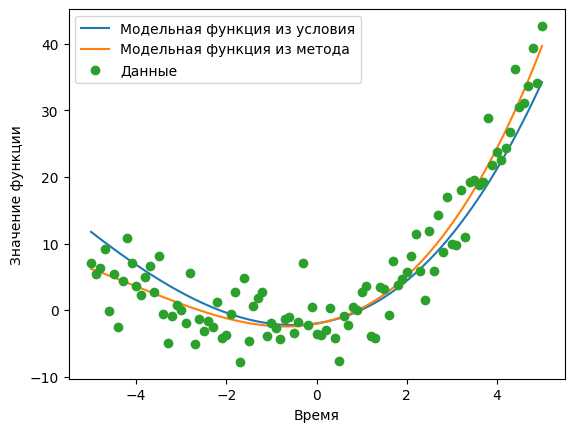

Оптимальное значение x: [-2.05604718  1.24774275  0.99924817  0.08401458]
Число обусловленности матрицы Якоби: 73.26324356492972
Целевая функция из условия: 852.7228970819308
Целевая функция из метода: 577.1574278051112


In [4]:
with open("var_1.dat") as f:
    t = np.array(list(map(float, f.readline().split(','))))
    y = np.array(list(map(float, f.readline().split(','))))

# Оптимизация целевой функции
x_opt = gauss_newton(x0, t, y, eps=0.001)

# Оценка числа обусловленности матрицы Якоби
jac = J(x_opt, t)
cond_num = np.linalg.cond(jac)

# Построение графика модельной функции
t_plot = np.linspace(t.min(), t.max(), 100)
y_plot = np.linspace(y.min(), y.max(), 100)
phi_plot_cond = phi(x[0], x[1], x[2], x[3], t_plot)
phi_plot_meth = phi(x_opt[0], x_opt[1], x_opt[2], x_opt[3], t_plot)
F_plot_cond = F(x, t, y)
F_plot1_meth = F(x_opt, t, y)
plt.plot(t_plot, phi_plot_cond, label='Модельная функция из условия')
plt.plot(t_plot, phi_plot_meth, label='Модельная функция из метода')
plt.plot(t, y, 'o', label='Данные')
plt.xlabel('Время')
plt.ylabel('Значение функции')
plt.legend()
plt.show()

print(f"Оптимальное значение x: {x_opt}")
print(f"Число обусловленности матрицы Якоби: {cond_num}")
print(f"Целевая функция из условия: {F_plot_cond}")
print(f"Целевая функция из метода: {F_plot1_meth}")